In [1]:
import  math
import numpy as np
import matplotlib as mpl
from matplotlib import rc,gridspec
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import yoda

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [2]:
datadir="data/"

Sherpa_h=yoda.readYODA(datadir+"Sherpa/Higgs/nlops.yoda")
Sherpa_z=yoda.readYODA(datadir+"Sherpa/ZJ/nlops.yoda")
Sherpa_j=yoda.readYODA(datadir+"Sherpa/Jets/nlops.yoda")

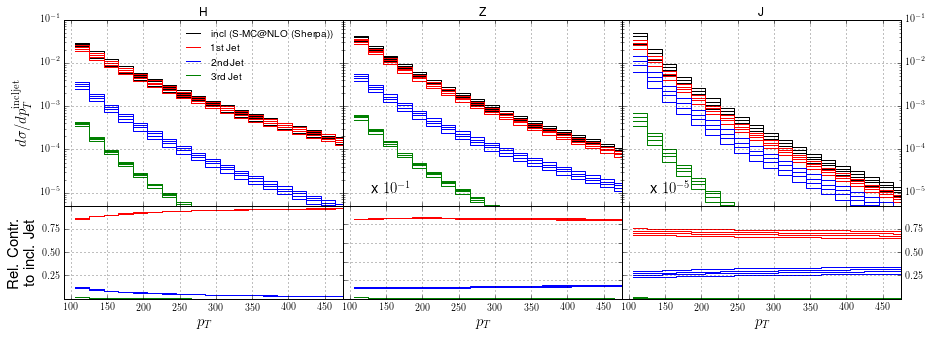

In [5]:
plt.clf()
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 5))
fig=plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(3, 3,width_ratios= [1,1,1],height_ratios= [1,1,1])
gs.update(wspace=0.0, hspace=0.0)
axH     = plt.subplot(gs[0:2, 0])
axZ     = plt.subplot(gs[0:2, 1])
axJ     = plt.subplot(gs[0:2, 2])
#axconH     = plt.subplot(gs[2, 0])
#axconZ     = plt.subplot(gs[2, 1])
#axconJ     = plt.subplot(gs[2, 2])
axratH     = plt.subplot(gs[2, 0])
axratZ     = plt.subplot(gs[2, 1])
axratJ     = plt.subplot(gs[2, 2])

xxx=range(10,50,2)

def rebin(yo,name):    
    
    a=np.array(yo[name].yVals())[:]
    xmaxs=np.array(yo[name].xMaxs())[:]
    xmins=np.array(yo[name].xMins())[:]
    
    res=[sum((a*(xmaxs-xmins))[xxx[0]:xxx[1]])/(xmaxs[xxx[1]]-xmins[xxx[0]])]
    for i in range(1,len(xxx)-1):
        res+=[sum((a*(xmaxs-xmins))[xxx[i-1]:xxx[i]])/(xmaxs[xxx[i]]-xmins[xxx[i-1]]),
              sum((a*(xmaxs-xmins))[xxx[i]:xxx[i+1]])/(xmaxs[xxx[i+1]]-xmins[xxx[i]])]
    res+=[sum((a*(xmaxs-xmins))[xxx[-2]:xxx[-1]])/(xmaxs[xxx[-1]]-xmins[xxx[-2]])]
    
    return np.array(res)


def rebinx(yo,name):
    a=np.array(yo[name].xVals())[:]
    res=[a[xxx[0]]]
    for i in range(1,len(xxx)-1):
        res+=[a[xxx[i]],a[xxx[i]]]
    res+=[a[xxx[len(xxx)-1]]]
    return np.array(res)

rat=[]
for R,i in zip(["03","05","07","10"],range(6)):
    x=rebinx(Sherpa_h,"/LH2017_ZHJETS/J_incl_pT_R%s"%R)
    nloincl=rebin(Sherpa_h,"/LH2017_ZHJETS/J_incl_pT_R%s"%R)
    nlo1=rebin(Sherpa_h,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nlo2=rebin(Sherpa_h,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nlo3=rebin(Sherpa_h,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    if R=="03":
        axH.plot(x,nloincl,color="black",label="incl (S-MC@NLO (Sherpa))")
        axH.plot(x,nlo1,color="red",label="1st Jet")
        axH.plot(x,nlo2,color="blue",label="2nd Jet")
        axH.plot(x,nlo3,color="green",label="3rd Jet")
    else:
        axH.plot(x,nloincl,color="black",label="")
        axH.plot(x,nlo1,color="red",label="")
        axH.plot(x,nlo2,color="blue",label="")
        axH.plot(x,nlo3,color="green",label="")
    rat=nloincl
    axratH.plot(x,nlo1/rat,color="red")
    axratH.plot(x,nlo2/rat,color="blue")
    axratH.plot(x,nlo3/rat,color="green")
axH.semilogy()    

rat=[]

for R,i in zip(["03","05","07","10"],range(6)):
    x=rebinx(Sherpa_z,"/LH2017_ZHJETS_B/J_incl_pT_R%s"%R)
    nloincl=rebin(Sherpa_z,"/LH2017_ZHJETS_B/J_incl_pT_R%s"%R)
    nlo1=rebin(Sherpa_z,"/LH2017_ZHJETS_B/J1_pT_R%s"%R)
    nlo2=rebin(Sherpa_z,"/LH2017_ZHJETS_B/J2_pT_R%s"%R)
    nlo3=rebin(Sherpa_z,"/LH2017_ZHJETS_B/J3_pT_R%s"%R)
    axZ.plot(x,nloincl*10**(-1),color="black",label="")
    axZ.plot(x,nlo1*10**(-1),color="red",label="")
    axZ.plot(x,nlo2*10**(-1),color="blue",label="")
    axZ.plot(x,nlo3*10**(-1),color="green",label="")
    rat=nloincl
    axratZ.plot(x,nlo1/rat,color="red")
    axratZ.plot(x,nlo2/rat,color="blue")
    axratZ.plot(x,nlo3/rat,color="green")
    
    
axZ.semilogy()    


rat=[]
for R,i in zip(["03","05","07","10"],range(6)):
    x=rebinx(Sherpa_j,"/LH2017_ZHJETS/J_incl_pT_R%s"%R)
    nloincl=rebin(Sherpa_j,"/LH2017_ZHJETS/J_incl_pT_R%s"%R)
    nlo1=rebin(Sherpa_j,"/LH2017_ZHJETS/J1_pT_R%s"%R)
    nlo2=rebin(Sherpa_j,"/LH2017_ZHJETS/J2_pT_R%s"%R)
    nlo3=rebin(Sherpa_j,"/LH2017_ZHJETS/J3_pT_R%s"%R)
    axJ.plot(x,nloincl*10**(-6),color="black",label="")
    axJ.plot(x,nlo1*10**(-6),color="red",label="")
    axJ.plot(x,nlo2*10**(-6),color="blue",label="")
    axJ.plot(x,nlo3*10**(-6),color="green",label="")
    rat=nloincl
    axratJ.plot(x,nlo1/rat,color="red")
    axratJ.plot(x,nlo2/rat,color="blue")
    axratJ.plot(x,nlo3/rat,color="green")
    
axJ.text(0.1, 0.05, "x $10^{-5}$",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axJ.transAxes, color='black', fontsize=15)


axZ.text(0.1, 0.05, "x $10^{-1}$",
                 verticalalignment='bottom',  horizontalalignment='left',
                 transform=axZ.transAxes, color='black', fontsize=15)


axZ.set_yticklabels([])
axratZ.set_yticklabels([])

axJ.yaxis.tick_right()
axratJ.yaxis.tick_right()

for ax in [axZ,axJ,axH,axratH,axratJ,axratZ]:
    ax.xaxis.set_ticks_position("both")
    ax.xaxis.set_tick_params(direction="in",which="both")
    ax.yaxis.set_ticks_position("both")
    ax.yaxis.set_tick_params(direction="in",which="both")
    ax.grid(linestyle='dotted');



axJ.yaxis.set_label_position("right")
    

    

axH.legend(frameon=False,fontsize=10)
axZ.set_xlim([90.0,475])
axH.set_xlim([90.0,475])
axJ.set_xlim([90.0,475])


axratH.set_xlim([90.0,475])
axratZ.set_xlim([90.0,475])
axratJ.set_xlim([90.0,475])

axZ.set_ylim([0.000005,0.1])
axH.set_ylim([0.000005,0.1])
axJ.set_ylim([0.000005,0.1])

axratH.set_ylim([0.0,1.0])
axratZ.set_ylim([0.0,1.0])
axratJ.set_ylim([0.0,1.0])

axJ.semilogy()    

axH.set_title("H")
axZ.set_title("Z")
axJ.set_title("J")

axratH.set_xlabel("$p_T$", fontsize=15)
axratZ.set_xlabel("$p_T$", fontsize=15)
axratJ.set_xlabel("$p_T$", fontsize=15)

axH.set_ylabel("$d\sigma/dp^{\mathrm{incl jet}}_T$", fontsize=15)
axratH.set_ylabel("Rel. Contr. \n to incl. Jet", fontsize=15)

axratH.yaxis.set_ticks(np.arange(0.25, 1.0, 0.25))
axratJ.yaxis.set_ticks(np.arange(0.25, 1.0, 0.25))

fig.savefig("Comparison_Contributions.pdf",bbox_inches='tight')
plt.show()